#                                     MACHINE LEARNING -Course Project

# Zebra Crossing Detection

In [53]:
import os
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [54]:
import skimage.data

In [3]:
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    #test-girish
    
    #print(directories)
    #print(labels)
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        #print(label_dir)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        #print(file_names)
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    print(len(images))
    print(labels)
    return images, labels


# Load training and testing datasets.
ROOT_PATH = "pic"
train_data_dir = os.path.join(ROOT_PATH, "datasets/train")
test_data_dir = os.path.join(ROOT_PATH, "datasets/test")

images, labels = load_data(train_data_dir)

16
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


In [4]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 2
Total Images: 16


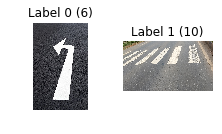

In [57]:
def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)

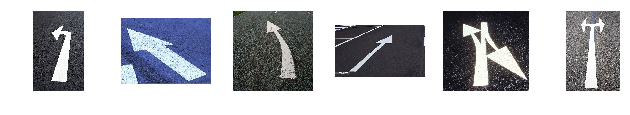

In [6]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

display_label_images(images, 0)

In [7]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (2268, 4032, 3), min: 0, max: 255
shape: (2268, 4032, 3), min: 0, max: 255
shape: (2268, 4032, 3), min: 0, max: 255
shape: (2268, 4032, 3), min: 0, max: 255
shape: (2268, 4032, 3), min: 0, max: 255


/home/deepika/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


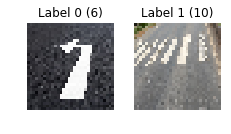

In [8]:
# Resize images
images32 = [skimage.transform.resize(image, (32, 32))
                for image in images]
display_images_and_labels(images32, labels)

In [9]:
for image in images32[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32, 3), min: 0.001838235294124613, max: 1.0
shape: (32, 32, 3), min: 0.18002450980388426, max: 1.0
shape: (32, 32, 3), min: 0.016544117647007913, max: 1.0
shape: (32, 32, 3), min: 0.12352941176470991, max: 1.0
shape: (32, 32, 3), min: 0.061642156862735734, max: 1.0


In [58]:
labels_a = np.array(labels)
images_a = np.array(images32)
print("labels: ", labels_a.shape, "\nimages: ", images_a.shape)

labels:  (16,) 
images:  (16, 32, 32, 3)


In [59]:
# Create a graph to hold the model.
graph = tf.Graph()

# Create model in the graph.
with graph.as_default():
    # Placeholders for inputs and labels.
    images_ph = tf.placeholder(tf.float32, [None, 32, 32, 3])
    labels_ph = tf.placeholder(tf.int32, [None])
   
    print (images_ph)
    # Flatten input from: [None, height, width, channels]
    # To: [None, height * width * channels] == [None, 3072]
    images_flat = tf.contrib.layers.flatten(images_ph)

    # Fully connected layer. 
    # Generates logits of size [None, 62]
    logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

    # Convert logits to label indexes (int).
    # Shape [None], which is a 1D vector of length == batch_size.
    predicted_labels = tf.argmax(logits, 1)

    # Define the loss function. 
    # Cross-entropy is a good choice for classification.
    
    #loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits, labels_ph))

    #loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits, train_labels_node))
    #labels=train_labels_node, logits=logits
    
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels_ph, logits=logits))
    
    # Create training op.
    train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

    # And, finally, an initialization op to execute before training.
    # TODO: rename to tf.global_variables_initializer() on TF 0.12.
    init = tf.initialize_all_variables()

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", predicted_labels)

Tensor("Placeholder:0", shape=(?, 32, 32, 3), dtype=float32)
Instructions for updating:
Use `tf.global_variables_initializer` instead.
images_flat:  Tensor("Flatten/Reshape:0", shape=(?, 3072), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [60]:
# Create a session to run the graph we created.
session = tf.Session(graph=graph)

# First step is always to initialize all variables. 
# We don't care about the return value, though. It's None.
_ = session.run([init])

In [61]:
for i in range(201):
    _, loss_value = session.run([train, loss], 
                                feed_dict={images_ph: images_a, labels_ph: labels_a})
    if i % 10 == 0:
        print("Loss: ", loss_value)

Loss:  4.17567
Loss:  0.439924
Loss:  0.178693
Loss:  0.0842225
Loss:  0.0481487
Loss:  0.0323098
Loss:  0.0242179
Loss:  0.0194507
Loss:  0.0162933
Loss:  0.0140135
Loss:  0.0122677
Loss:  0.0108771
Loss:  0.00973939
Loss:  0.00879076
Loss:  0.00798808
Loss:  0.00730079
Loss:  0.00670676
Loss:  0.00618882
Loss:  0.00573414
Loss:  0.00533201
Loss:  0.00497452


In [62]:
import random

In [38]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: sample_images})[0]
print(sample_labels)
print(predicted)

[1, 0, 1, 0, 1, 1, 0, 1, 1, 1]
[1 0 1 0 1 1 0 1 1 1]


In [42]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
   # plt.imshow(sample_images[i])


In [48]:
# Load the test dataset.
test_images, test_labels = load_data(test_data_dir)
print(len(test_images))


5
[0, 0, 0, 0, 0]
5


/home/deepika/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


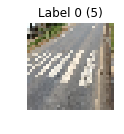

In [49]:
# Transform the images, just like we did with the training set.
test_images32 = [skimage.transform.resize(image, (32, 32))
                 for image in test_images]
display_images_and_labels(test_images32, test_labels)

In [50]:
print(len(test_images32))

5


/home/deepika/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


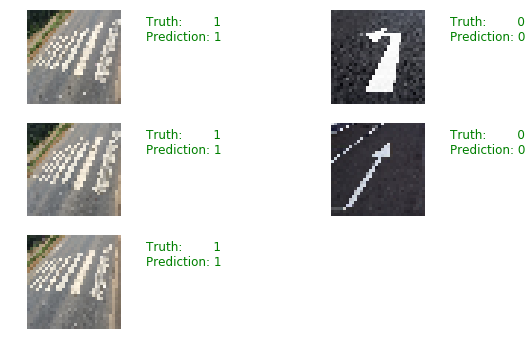

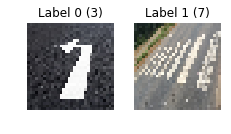

In [51]:
# Display the predictions and the ground truth visually.
test_indexes = random.sample(range(len(images32)), 10)
test_images = [images32[i] for i in sample_indexes]
test_labels = [labels[i] for i in sample_indexes]


fig = plt.figure(figsize=(10, 10))
for i in range(len(test_images32)):
    truth = test_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(test_images[i])

    
test_images32 = [skimage.transform.resize(image, (32, 32))
                 for image in test_images]
display_images_and_labels(test_images32, test_labels)    

In [52]:
# Run predictions against the full test set.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: test_images32})[0]
# Calculate how many matches we got.
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])
accuracy = match_count / len(test_labels)
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 1.000


In [29]:
# Close the session. This will destroy the trained model.
session.close()